In [1]:
from pathlib import Path

notebook_dir = Path('data')
data_file_paths = [p for p in notebook_dir.iterdir()]

In [2]:
from collections import OrderedDict
import numpy as np
import re

data_dict = dict()

for path in data_file_paths:
    matched = re.search('data/(.+?).csv', str(path))
    frac = matched.group(1)
    data = np.loadtxt(path, dtype=int, delimiter=',')
    data_avg = np.mean(data, axis=0)/(100*100)
    data_std = np.std(data, axis=0)/(100*100)
    data_dict[frac] = (data_avg, data_std)

nr_iterations = len(data_avg)  # will use this later
    
sorted_data_dict = OrderedDict(sorted(data_dict.items(), key=lambda t: float(t[0])))
sorted_data_dict

OrderedDict([('0.02',
              (array([0.020016, 0.000618, 0.000288, ..., 0.000304, 0.000302, 0.000304]),
               array([0.00127755, 0.00040034, 0.00034937, ..., 0.00062385, 0.00060696,
                      0.00062385]))),
             ('0.04',
              (array([0.03998 , 0.004155, 0.002236, ..., 0.00262 , 0.00262 , 0.00262 ]),
               array([0.00228897, 0.00116562, 0.00101907, ..., 0.00325942, 0.00325942,
                      0.00325942]))),
             ('0.06',
              (array([0.060111, 0.012925, 0.008313, ..., 0.01036 , 0.01036 , 0.01036 ]),
               array([0.00236778, 0.0023106 , 0.00199603, ..., 0.00634788, 0.00634788,
                      0.00634788]))),
             ('0.08',
              (array([0.080349, 0.027902, 0.020413, ..., 0.022184, 0.022174, 0.02216 ]),
               array([0.00257086, 0.00327014, 0.00304153, ..., 0.00631414, 0.00637491,
                      0.00631593]))),
             ('0.1',
              (array([0.099667, 0.0

In [3]:
print("Read in fractions:")
_ = [print(frac) for frac in sorted_data_dict]

Read in fractions:
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7
0.72
0.74
0.76
0.78
0.8
0.82
0.84
0.86
0.88
0.9
0.92
0.94
0.96
0.98


ValueError: x and y must have same first dimension, but have shapes (5001,) and (20001,)

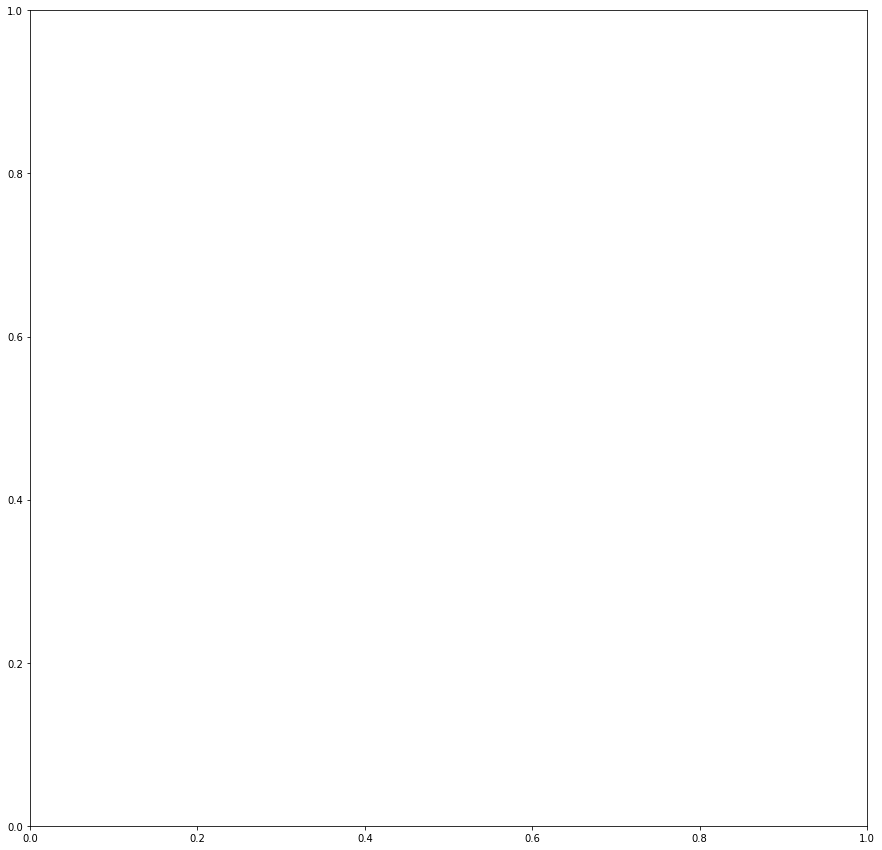

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle

fig, ax = plt.subplots(figsize=(15, 15))

colors = cycle(['C'+str(n) for n in range(9)])

x = np.arange(nr_iterations)
for frac, color in zip([f for f in sorted_data_dict if len(f)<4], colors):
    y, yerr = sorted_data_dict.get(frac)
    y_upper = y + yerr
    y_lower = y - yerr
    ax.plot(x, y, label=frac, color=color)
    ax.fill_between(x, y_upper, y_lower, facecolor=color, alpha=0.2)

ax.set_xlabel("Iterations")
ax.set_ylabel("Fraction Alive")
ax.legend()

fig.savefig("full_results.png", dpi=150)

In [ ]:
ax.set_ylim(0, 0.2)

fig

In [ ]:
ax.set_xlim(0, 250)

fig

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

x = np.arange(nr_iterations)
for frac, color in zip([f for f in sorted_data_dict if 0 < float(f) < 0.3], colors):
    y, yerr = sorted_data_dict.get(frac)
    y_upper = y + yerr
    y_lower = y - yerr
    ax.plot(x, y, label=frac, color=color)
    ax.fill_between(x, y_upper, y_lower, facecolor=color, alpha=0.2)

ax.set_xlabel("Iterations")
ax.set_ylabel("Fraction Alive")
ax.legend()

fig.savefig("full_results.png", dpi=150)